In [1]:
#Importing packages
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report

In [2]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib

In [3]:
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:\\Users\\A\\Desktop\\Bioactive\\CAL-27")

In [4]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [5]:
Cv_optuna= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

In [6]:
#Reading the data
ML_data= pd.read_csv("./ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original_data.csv',index_col=0)
#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(260, 3959)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
1401,523.76,6.629873,46.2498,78.7157,49.3472,90.1747,0.585441,0.996401,0.624648,1.141452,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2375,430.41,10.009535,29.8367,45.7088,29.3183,49.4346,0.693877,1.062995,0.681821,1.149642,...,0.0,0.0,6.0,6.0,26.0,0.896552,5.0,0.172414,24.657656,4.472136
3218,294.43,6.264468,26.7076,46.7960,28.7162,53.2352,0.568247,0.995660,0.610983,1.132664,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3385,130.09,10.840833,8.3825,13.2545,7.6193,14.1703,0.698542,1.104542,0.634942,1.180858,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4091,129.20,6.460000,10.6874,20.1598,11.3127,23.7371,0.534370,1.007990,0.565635,1.186855,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [7]:
Raw_data

,IsomericSMILES,Activity,Canonical_smiles
cid,,,
1401,CCN(CC)CCCCNC1=NC2=NC(=C(C=C2C=N1)C3=CC(=CC(=C...,0,CCN(CC)CCCCNc1ncc2cc(-c3cc(OC)cc(OC)c3)c(NC(=O...
2375,CC(CS(=O)(=O)C1=CC=C(C=C1)F)(C(=O)NC2=CC(=C(C=...,0,CC(O)(CS(=O)(=O)c1ccc(F)cc1)C(=O)Nc1ccc(C#N)c(...
3218,CCCCCCCCCCCC1=C(C(=O)C=C(C1=O)O)O,0,CCCCCCCCCCCC1=C(O)C(=O)C=C(O)C1=O
3385,C1=C(C(=O)NC(=O)N1)F,0,O=c1[nH]cc(F)c(=O)[nH]1
4091,CN(C)C(=N)N=C(N)N,0,CN(C)C(=N)N=C(N)N
...,...,...,...
166626291,CC1=C2C3=C(N1)N=CC(=C3)C4=C(N(N=C4CN(C(=O)CCCN...,0,Cc1[nH]c2ncc3cc2c1-c1cn(nc1C(F)(F)F)CCCC(=O)N(...
166628143,CC(C)N1CC2=NN(C(=C2C3=CC4=C(NC=C4C5=CN(CCCC1=O...,1,COc1c2c(nn1C)CN(C(C)C)C(=O)CCCn1cc(c(C(F)(F)F)...
166632243,CC1=C2C3=C(N1)N=CC(=C3)C4=C(N(N=C4CN(C(=O)CCCN...,0,COc1c2c(nn1C)CN(C(C)C)C(=O)CCCn1cc(c(C(F)(F)F)...


In [9]:
#Data after feature selection (descriptors= 64）
print(ML_data.shape)
ML_data.head()

(260, 87)


,SAdon,MATS3e,F03[O-O],CATS2D_04_DL,MATS1i,SHED_DA,O-056,nRNHO,CATS2D_05_DL,CATS2D_00_DA,...,B08[N-O],GATS8v,CATS2D_07_LL,MATS7e,GATS1p,VE2sign_Dz(i),C-030,O-059,T(N..O),N-072
cid,,,,,,,,,,,,,,,,,,,,,
1401,0.085656,0.393420,0.000000,0.571429,0.513454,0.404071,0.000,0.0,0.272727,0.000,...,1.0,0.621819,0.200,0.351189,0.652889,0.737363,0.0,0.0,0.033421,0.250
2375,0.096217,0.446612,0.083333,0.071429,0.797373,0.339157,0.125,0.0,0.363636,0.125,...,1.0,0.581549,0.025,0.578201,0.475360,0.194267,0.0,0.0,0.010938,0.125
3218,0.135330,1.000000,0.166667,0.142857,0.849277,0.171787,0.000,0.0,0.181818,0.250,...,0.0,0.601115,0.150,0.419392,0.573471,0.949283,0.0,0.0,0.000000,0.000
3385,0.057104,0.480188,0.000000,0.000000,0.518560,0.104970,0.000,0.0,0.000000,0.000,...,0.0,0.000000,0.000,0.468814,0.450914,0.051565,0.0,0.0,0.002026,0.250
4091,0.154512,0.000000,0.000000,0.000000,0.000000,0.113052,0.000,0.0,0.000000,0.000,...,0.0,0.000000,0.000,1.000000,0.841813,0.166819,0.0,0.0,0.000000,0.000


# DT

In [10]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Activity'].values
clf=DecisionTreeClassifier(random_state=0)

In [11]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.638846,0.008564
Accuracy_train,1.000000,0.000000
F1 Score,0.701961,0.007793
Precision,0.709862,0.008221
Recall,0.702458,0.010538
Roc_auc,0.620547,0.009180


In [12]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.652308,0.008936
Accuracy_train,1.000000,0.000000
F1 Score,0.707333,0.008354
Precision,0.728071,0.008068
Recall,0.696000,0.011128
Roc_auc,0.640273,0.009324


In [13]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-11-05 22:53:01,313] A new study created in memory with name: no-name-6076ff09-e447-4cb2-a129-3aaa573cce60
[I 2023-11-05 22:53:02,947] Trial 0 finished with value: 0.6596153846153847 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6596153846153847.
[I 2023-11-05 22:53:02,996] Trial 1 finished with value: 0.6188461538461538 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6596153846153847.
[I 2023-11-05 22:53:03,043] Trial 2 finished with value: 0.6365384615384615 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 0 with value: 0.6596153846153847.
[I 2023-11-05 22:53:03,093] Trial 3 finished with value: 0.6473076923076924 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 0 with value: 0.6596153846153847.
[I 2023-11-05 22:53:03,145] Trial 4 finished with value: 0.657692307692307

In [14]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 4, 'max_features': 13, 'min_samples_split': 14}


In [15]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.693462,0.008131
Accuracy_train,0.828675,0.001586
F1 Score,0.746580,0.006627
Precision,0.761065,0.008109
Recall,0.742750,0.009851
Roc_auc,0.700128,0.010027


In [16]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [17]:
data_dt=ML_data[columns]
data_dt.to_csv("./data_dt.csv",sep=',')
X_DT=np.array(data_dt)

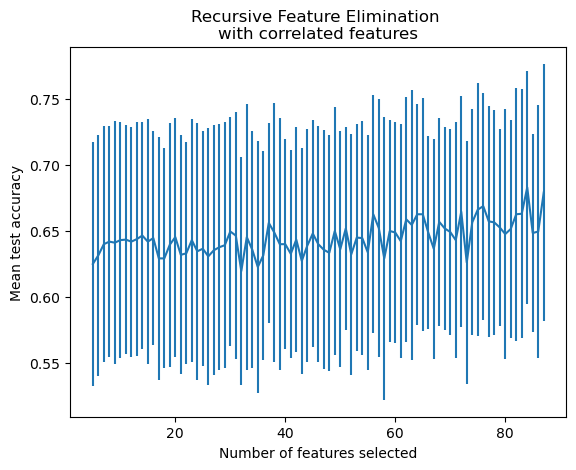

In [18]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [19]:
#Model4 （len(columns) descriptors）
Model4_clf=DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)
Model4_clf.fit(X_DT, y)
#Model4
Model4=Model_results(Model4_clf,X_DT,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.671538,0.008275
Accuracy_train,0.832607,0.001585
F1 Score,0.738207,0.007538
Precision,0.720022,0.007083
Recall,0.769875,0.012282
Roc_auc,0.660874,0.008805


In [20]:
Model4_clf=Model4_clf.fit(X_DT, y)
#Saving the final model
joblib.dump(Model4_clf, './DT.pkl')
DT= joblib.load(filename='./DT.pkl')

In [8]:
DT= joblib.load(filename='./DT.pkl')

In [21]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./DT_model_data.csv",sep=',')
Model_data.columns = [['DecisionTree']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./DT_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/DT_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         DecisionTree                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.638846  0.008564  0.652308  0.008936  0.693462  0.008131   
Accuracy_train     1.000000  0.000000  1.000000  0.000000  0.828675  0.001586   
F1 Score           0.701961  0.007793  0.707333  0.008354  0.746580  0.006627   
Precision          0.709862  0.008221  0.728071  0.008068  0.761065  0.008109   
Recall             0.702458  0.010538  0.696000  0.011128  0.742750  0.009851   
Roc_auc            0.620547  0.009180  0.640273  0.009324  0.700128  0.010027   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.671538  0.008275  
Accuracy_train  0.832607  0.001585  
F1 Score        0.738207  0.007538  
Precision       0.720022  0.007083  
Recall          0.769875  0.012282  
Roc_auc         0.660874  0.008805

# LR

In [22]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Activity'].values
clf=LogisticRegression(solver='liblinear',random_state=0)

In [23]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.686538,0.007719
Accuracy_train,0.900598,0.002485
F1 Score,0.750824,0.006527
Precision,0.732092,0.006922
Recall,0.777917,0.009545
Roc_auc,0.691898,0.009994


In [24]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.691923,0.008796
Accuracy_train,0.797692,0.001313
F1 Score,0.754656,0.007429
Precision,0.736901,0.007889
Recall,0.781875,0.010688
Roc_auc,0.740000,0.008601


In [25]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-11-05 22:55:05,480] A new study created in memory with name: no-name-c5c17de9-37a4-4a6f-9195-717585573aa6
[I 2023-11-05 22:55:05,566] Trial 0 finished with value: 0.7034615384615384 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.7034615384615384.
[I 2023-11-05 22:55:05,652] Trial 1 finished with value: 0.6623076923076924 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.7034615384615384.
[I 2023-11-05 22:55:05,735] Trial 2 finished with value: 0.6292307692307693 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.7034615384615384.
[I 2023-11-05 22:55:05,819] Trial 3 finished with value: 0.69 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 0 with value: 0.7034615384615384.
[I 20

In [26]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 0.2985115072391935, 'l1_ratio': 0.8353665980178986, 'max_iter': 173}


In [27]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.704231,0.007686
Accuracy_train,0.771795,0.001444
F1 Score,0.767844,0.006085
Precision,0.742475,0.007330
Recall,0.802750,0.009041
Roc_auc,0.747066,0.008575


In [28]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [29]:
data_lr=ML_data[columns]
data_lr.to_csv("./data_lr.csv",sep=',')
X_LR=np.array(data_lr)

In [30]:
data_lr

,MATS3e,CATS2D_04_DL,MATS1i,SHED_DA,O-056,nRNHO,CATS2D_00_DA,P_VSA_charge_3,MATS1m,GATS3e,...,minsssN,MATS2e,F07[N-O],P_VSA_charge_4,VE2sign_H2,B08[N-O],GATS8v,CATS2D_07_LL,GATS1p,C-030
cid,,,,,,,,,,,,,,,,,,,,,
1401,0.393420,0.571429,0.513454,0.404071,0.000,0.0,0.000,0.538320,0.438791,0.755597,...,0.989941,0.526923,0.000000,0.135121,0.339506,1.0,0.621819,0.200,0.652889,0.0
2375,0.446612,0.071429,0.797373,0.339157,0.125,0.0,0.125,0.543428,0.603547,0.461569,...,0.000000,0.719362,0.000000,0.611304,0.738126,1.0,0.581549,0.025,0.475360,0.0
3218,1.000000,0.142857,0.849277,0.171787,0.000,0.0,0.250,0.000000,0.177914,0.080508,...,0.000000,0.389529,0.000000,0.000000,0.160792,0.0,0.601115,0.150,0.573471,0.0
3385,0.480188,0.000000,0.518560,0.104970,0.000,0.0,0.000,0.230534,0.000000,0.684424,...,0.000000,0.439702,0.000000,0.120427,0.811539,0.0,0.000000,0.000,0.450914,0.0
4091,0.000000,0.000000,0.000000,0.113052,0.000,0.0,0.000,0.000000,0.016721,1.000000,...,0.615272,1.000000,0.000000,0.135121,0.823371,0.0,0.000000,0.000,0.841813,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166626291,0.660415,0.071429,0.677991,0.284553,0.000,0.0,0.000,0.153893,0.416894,0.165660,...,0.615435,0.719223,0.000000,0.879573,0.387484,1.0,0.708849,0.125,0.466017,0.0
166628143,0.672963,0.071429,0.656939,0.266537,0.000,0.0,0.000,0.170181,0.452357,0.193576,...,0.704217,0.684788,0.083333,0.629550,0.242181,1.0,0.765358,0.150,0.541873,0.0
166632243,0.650270,0.071429,0.660611,0.266537,0.000,0.0,0.000,0.170181,0.455397,0.221218,...,0.705905,0.704815,0.083333,0.629550,0.318646,1.0,0.760423,0.175,0.549273,0.0


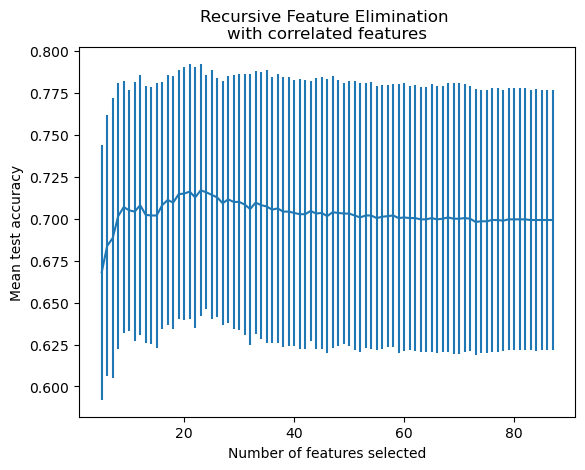

In [31]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [32]:
#Model4 （len(columns) descriptors）
Model4_clf=LogisticRegression(C=study.best_params['logreg_c'],max_iter=study.best_params['max_iter'],solver='liblinear',random_state=0)
#Model4
Model4=Model_results(Model4_clf,X_LR,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.755000,0.007705
Accuracy_train,0.777009,0.001063
F1 Score,0.805743,0.006225
Precision,0.784890,0.007184
Recall,0.835458,0.009328
Roc_auc,0.790100,0.008004


In [33]:
Model4_clf=Model4_clf.fit(X_LR, y)
#Saving the final model
joblib.dump(Model4_clf, './LogReg.pkl')


In [10]:
LogReg= joblib.load(filename='./LogReg.pkl')

In [34]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./LR_model_data.csv",sep=',')
Model_data.columns = [['LogisticRegression']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./LR_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         LogisticRegression                                          \
Model                     Model 1             Model 2             Model 3   
Values                       Mean        Se      Mean        Se      Mean   
Accuracy_test            0.686538  0.007719  0.691923  0.008796  0.704231   
Accuracy_train           0.900598  0.002485  0.797692  0.001313  0.771795   
F1 Score                 0.750824  0.006527  0.754656  0.007429  0.767844   
Precision                0.732092  0.006922  0.736901  0.007889  0.742475   
Recall                   0.777917  0.009545  0.781875  0.010688  0.802750   
Roc_auc                  0.691898  0.009994  0.740000  0.008601  0.747066   

Method                                        
Model                      Model 4            
Values                Se      Mean        Se  
Accuracy_test   0.007686  0.755000  0.007705  
Accuracy_train  0.001444  0.777009  0.001063  
F1 Score        0.006085  0.805743  0.006225  
Precision       0.007330  0.784890  0.007184  
Recall          0.009041  0.835458  0.009328  
Roc_auc         0.008575  0.790100  0.008004

In [19]:
data_lr=pd.read_csv("./data_lr.csv",sep=',',index_col=0)

In [20]:
data_lr

,MATS3e,CATS2D_04_DL,MATS1i,SHED_DA,O-056,nRNHO,CATS2D_00_DA,P_VSA_charge_3,MATS1m,GATS3e,...,minsssN,MATS2e,F07[N-O],P_VSA_charge_4,VE2sign_H2,B08[N-O],GATS8v,CATS2D_07_LL,GATS1p,C-030
cid,,,,,,,,,,,,,,,,,,,,,
1401,0.393420,0.571429,0.513454,0.404071,0.000,0.0,0.000,0.538320,0.438791,0.755597,...,0.989941,0.526923,0.000000,0.135121,0.339506,1.0,0.621819,0.200,0.652889,0.0
2375,0.446612,0.071429,0.797373,0.339157,0.125,0.0,0.125,0.543428,0.603547,0.461569,...,0.000000,0.719362,0.000000,0.611304,0.738126,1.0,0.581549,0.025,0.475360,0.0
3218,1.000000,0.142857,0.849277,0.171787,0.000,0.0,0.250,0.000000,0.177914,0.080508,...,0.000000,0.389529,0.000000,0.000000,0.160792,0.0,0.601115,0.150,0.573471,0.0
3385,0.480188,0.000000,0.518560,0.104970,0.000,0.0,0.000,0.230534,0.000000,0.684424,...,0.000000,0.439702,0.000000,0.120427,0.811539,0.0,0.000000,0.000,0.450914,0.0
4091,0.000000,0.000000,0.000000,0.113052,0.000,0.0,0.000,0.000000,0.016721,1.000000,...,0.615272,1.000000,0.000000,0.135121,0.823371,0.0,0.000000,0.000,0.841813,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166626291,0.660415,0.071429,0.677991,0.284553,0.000,0.0,0.000,0.153893,0.416894,0.165660,...,0.615435,0.719223,0.000000,0.879573,0.387484,1.0,0.708849,0.125,0.466017,0.0
166628143,0.672963,0.071429,0.656939,0.266537,0.000,0.0,0.000,0.170181,0.452357,0.193576,...,0.704217,0.684788,0.083333,0.629550,0.242181,1.0,0.765358,0.150,0.541873,0.0
166632243,0.650270,0.071429,0.660611,0.266537,0.000,0.0,0.000,0.170181,0.455397,0.221218,...,0.705905,0.704815,0.083333,0.629550,0.318646,1.0,0.760423,0.175,0.549273,0.0


In [21]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./X_test_data.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_lr.columns.to_list()]
X_test=np.array(X_test_last)
X_test_last.head()

,MATS3e,CATS2D_04_DL,MATS1i,SHED_DA,O-056,nRNHO,CATS2D_00_DA,P_VSA_charge_3,MATS1m,GATS3e,...,minsssN,MATS2e,F07[N-O],P_VSA_charge_4,VE2sign_H2,B08[N-O],GATS8v,CATS2D_07_LL,GATS1p,C-030
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.565460,0.071429,0.402211,0.224130,0.000,0.0,0.000,0.153893,0.447755,0.664124,...,0.000000,0.391673,0.000000,0.135121,0.354283,0.0,0.569119,0.0,0.573290,1.0
13463,0.832077,0.071429,0.451828,0.378945,0.250,0.0,0.250,0.461680,0.187277,0.557748,...,0.000000,0.089993,0.166667,0.000000,0.153683,1.0,0.749524,0.0,0.412739,1.0
39148,0.889565,0.000000,0.325737,0.404071,0.250,0.0,0.250,0.461680,0.349173,0.461097,...,0.749703,0.153329,0.333333,0.000000,0.087196,0.0,0.676825,0.0,0.669398,1.0
56328,0.697811,0.000000,0.497443,0.397473,0.125,0.0,0.125,0.598837,0.302719,0.646799,...,0.000000,0.155371,0.166667,0.000000,0.092724,0.0,0.776514,0.0,0.577914,1.0
67358,0.789972,0.000000,0.491094,0.433527,0.375,0.0,0.375,0.325198,0.177298,0.488289,...,0.000000,0.078128,0.333333,0.000000,0.276725,1.0,0.786335,0.0,0.534484,1.0


In [26]:
#Predicted results
Predicted_data=pd.DataFrame(LogReg.predict_proba(X_test),columns=['Probability of non-cal27','Probability of cal27'])
Predicted_data.index=X_test_last.index
Predicted_data.sort_values(by="Probability of cal27" ,inplace=True, ascending=False)
Predicted_data.to_csv("./LR_predict_data.csv",sep=',')
Predicted_data.head()

,Probability of non-cal27,Probability of cal27
cid,,
131881061,0.070770,0.929230
73353418,0.071702,0.928298
131858474,0.074364,0.925636
131858479,0.076029,0.923971
92262645,0.076029,0.923971


# RF

In [35]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Activity'].values
clf=RandomForestClassifier(random_state=0)

In [36]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.722308,0.007799
Accuracy_train,1.000000,0.000000
F1 Score,0.780336,0.006596
Precision,0.758527,0.007528
Recall,0.812750,0.009983
Roc_auc,0.775150,0.008308


In [37]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.752692,0.007581
Accuracy_train,1.000000,0.000000
F1 Score,0.801739,0.006138
Precision,0.789804,0.007308
Recall,0.819792,0.008317
Roc_auc,0.791184,0.009004


In [38]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) #整数型，(参数名称，下界，上界，步长)
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) #浮点型
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2023-11-05 22:56:46,078] A new study created in memory with name: no-name-9151f7ca-0caa-4535-9de2-23a351357ec9
[I 2023-11-05 22:56:53,213] Trial 0 finished with value: 0.6115384615384614 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.6115384615384614.
[I 2023-11-05 22:56:58,734] Trial 1 finished with value: 0.6115384615384614 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.6115384615384614.
[I 2023-11-05 22:57:10,463] Trial 2 finished with value: 0.6115384615384614 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.6115384615384614.
[I 2023-11-05 22:57:17,702] Trial 3 finished with value: 0.6115384615384614 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [39]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 881, 'max_depth': 9, 'max_features': 7, 'min_impurity_decrease': 0.0007392099609671288}


In [40]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.754231,0.007594
Accuracy_train,0.997650,0.000221
F1 Score,0.804697,0.006237
Precision,0.785247,0.007239
Recall,0.831708,0.008863
Roc_auc,0.793011,0.008750


In [41]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [42]:
data_rf=ML_data[columns]
data_rf.to_csv("./data_rf.csv",sep=',')
X_RF=np.array(data_rf)

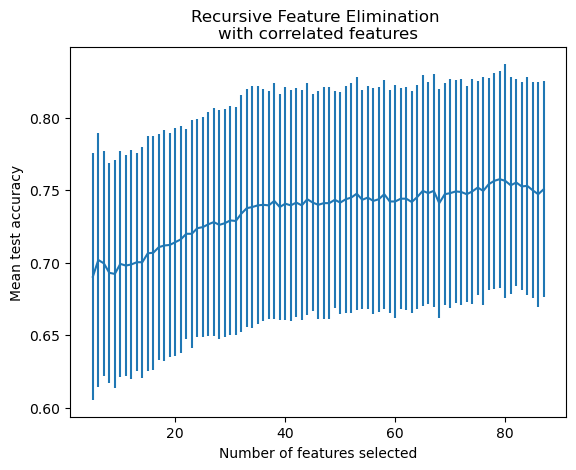

In [43]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [44]:
#Model4 （len(columns) descriptors）
Model4_clf=clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)
Model4_clf.fit(X_RF, y)
#Model4
Model4=Model_results(Model4_clf,X_RF,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.751154,0.007815
Accuracy_train,0.998205,0.000211
F1 Score,0.802644,0.006289
Precision,0.782333,0.007321
Recall,0.830500,0.008870
Roc_auc,0.792509,0.008690


In [45]:
Model4_clf=Model4_clf.fit(X_RF, y)
#Saving the final model
joblib.dump(Model4_clf, './RF.pkl')
RF= joblib.load(filename='./RF.pkl')

In [46]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./RF_model_data.csv",sep=',')
Model_data.columns = [['RandomForest']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./RF_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/RF_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         RandomForest                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.722308  0.007799  0.752692  0.007581  0.754231  0.007594   
Accuracy_train     1.000000  0.000000  1.000000  0.000000  0.997650  0.000221   
F1 Score           0.780336  0.006596  0.801739  0.006138  0.804697  0.006237   
Precision          0.758527  0.007528  0.789804  0.007308  0.785247  0.007239   
Recall             0.812750  0.009983  0.819792  0.008317  0.831708  0.008863   
Roc_auc            0.775150  0.008308  0.791184  0.009004  0.793011  0.008750   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.751154  0.007815  
Accuracy_train  0.998205  0.000211  
F1 Score        0.802644  0.006289  
Precision       0.782333  0.007321  
Recall          0.830500  0.008870  
Roc_auc         0.792509  0.008690

# xgboost

In [47]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Activity'].values
clf=xgb.XGBClassifier(random_state=0)

In [48]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.708846,0.007076
Accuracy_train,1.000000,0.000000
F1 Score,0.771307,0.005938
Precision,0.742299,0.006088
Recall,0.808250,0.008756
Roc_auc,0.746958,0.008528


In [49]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.726154,0.007659
Accuracy_train,1.000000,0.000000
F1 Score,0.782408,0.006283
Precision,0.762879,0.007048
Recall,0.809000,0.008776
Roc_auc,0.766727,0.009219


In [50]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-11-06 00:00:24,572] A new study created in memory with name: no-name-4e0888b4-d942-49c1-af32-ff061633459d
[I 2023-11-06 00:00:31,588] Trial 0 finished with value: 0.7269230769230769 and parameters: {'lambda': 0.15676677195506075, 'alpha': 0.7257005721594281, 'colsample_bytree': 0.7, 'subsample': 0.7000000000000001, 'learning_rate': 0.0801, 'n_estimators': 664}. Best is trial 0 with value: 0.7269230769230769.
[I 2023-11-06 00:00:35,579] Trial 1 finished with value: 0.7253846153846156 and parameters: {'lambda': 0.0562793204741517, 'alpha': 3.6905577292137624, 'colsample_bytree': 1.0, 'subsample': 0.6000000000000001, 'learning_rate': 0.1551, 'n_estimators': 552}. Best is trial 0 with value: 0.7269230769230769.
[I 2023-11-06 00:00:43,200] Trial 2 finished with value: 0.708076923076923 and parameters: {'lambda': 0.18714500686240676, 'alpha': 5.039489598671215, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.0001, 'n_estimators': 841}. Best is trial 0 with value: 0.7269

In [51]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.0028930833652447896, 'alpha': 0.014606692077241632, 'colsample_bytree': 0.3, 'subsample': 0.9, 'learning_rate': 0.0301, 'n_estimators': 755}


In [52]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.731923,0.008149
Accuracy_train,1.000000,0.000000
F1 Score,0.787442,0.006832
Precision,0.764952,0.007058
Recall,0.817917,0.009673
Roc_auc,0.781362,0.009337


In [53]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [54]:
data_xgb=ML_data[columns]
data_xgb.to_csv("./data_xgb.csv",sep=',')
X_XGB=np.array(data_xgb)

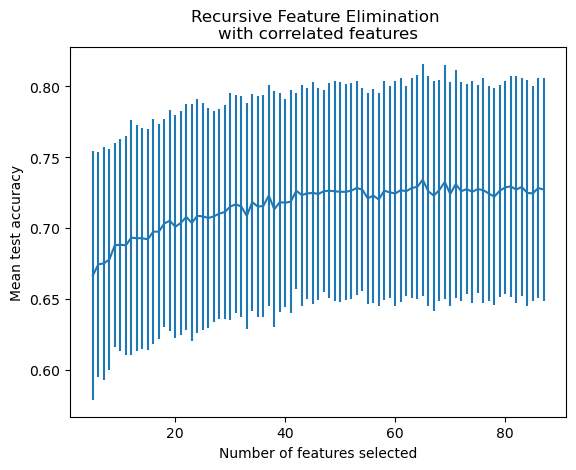

In [55]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [56]:
#Model4 （len(columns) descriptors）
Model4_clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)
Model4_clf.fit(X_XGB, y)
#Model4
Model4=Model_results(Model4_clf,X_XGB,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.735769,0.007391
Accuracy_train,1.000000,0.000000
F1 Score,0.790695,0.006096
Precision,0.768799,0.006771
Recall,0.820458,0.008897
Roc_auc,0.783373,0.008837


In [57]:
Model4_clf=Model4_clf.fit(X_XGB, y)
#Saving the final model
joblib.dump(Model4_clf, './XGB.pkl')
XGB= joblib.load(filename='./XGB.pkl')

In [58]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./XGB_model_data.csv",sep=',')
Model_data.columns = [['XGBoost']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./XGB_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method           XGBoost                                                    \
Model            Model 1             Model 2             Model 3             
Values              Mean        Se      Mean        Se      Mean        Se   
Accuracy_test   0.708846  0.007076  0.726154  0.007659  0.731923  0.008149   
Accuracy_train  1.000000  0.000000  1.000000  0.000000  1.000000  0.000000   
F1 Score        0.771307  0.005938  0.782408  0.006283  0.787442  0.006832   
Precision       0.742299  0.006088  0.762879  0.007048  0.764952  0.007058   
Recall          0.808250  0.008756  0.809000  0.008776  0.817917  0.009673   
Roc_auc         0.746958  0.008528  0.766727  0.009219  0.781362  0.009337   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.735769  0.007391  
Accuracy_train  1.000000  0.000000  
F1 Score        0.790695  0.006096  
Precision       0.768799  0.006771  
Recall          0.820458  0.008897  
Roc_auc         0.783373  0.008837